In [1]:
import pandas as pd
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("dataset_stan.csv")

Raw_data = data.head()
print(Raw_data)

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification    Age_st    BMI_st  Glucose_st  Insulin_st  \
0  417.114               1 -0.579794 -0.816675   -1.239222   -0.728739   
1  468.786               1  1.601821 -1.378751   -0.258299   -0.688038   
2  554.697               1  1.539489 -0.891764   -0.302887   -0.550073   
3  928.220               1  0.666843 -1.243303   -0.927110   -0.676965   
4  773.920               1  1.788816 -1.294601   -0.258299   -0.644743   

    HOMA_st  Leptin_st  Adiponectin_st  Resistin_st  MCP.1_st  \
0 -

In [4]:
# Now, set the independent variables (represented as X) and the dependent variable (represented as y):
# Here X (Independent variable) = inputs_ext
# And  Y (dependent variable)   = target
nputs = data.drop('Classification', axis='columns')
target = data['Classification']
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


In [5]:
inputs_ext = inputs.drop(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification_st'], axis = 'columns')
print(inputs_ext)

       Age_st    BMI_st  Glucose_st  Insulin_st   HOMA_st  Leptin_st  \
0   -0.579794 -0.816675   -1.239222   -0.728739 -0.614282  -0.932334   
1    1.601821 -1.378751   -0.258299   -0.688038 -0.548240  -0.930413   
2    1.539489 -0.891764   -0.302887   -0.550073 -0.464752  -0.454219   
3    0.666843 -1.243303   -0.927110   -0.676965 -0.574210  -0.876021   
4    1.788816 -1.294601   -0.258299   -0.644743 -0.521081  -1.042682   
..        ...       ...         ...         ...       ...        ...   
111 -0.766789 -0.146468   -0.258299   -0.666590 -0.534786   1.469335   
112  0.292852 -0.148468    0.098400   -0.546881 -0.435039  -0.741611   
113  0.479848  0.893855   -0.035362   -0.427172 -0.365106   1.825348   
114  0.916171 -0.398546   -0.704173   -0.717467 -0.585883  -0.086651   
115  1.788816 -0.080447    1.792721    0.987394  1.125766   3.333167   

     Adiponectin_st  Resistin_st  MCP.1_st  
0         -0.070222    -0.545517 -0.341251  
1         -0.697350    -0.864214 -0.191224  


In [6]:
x_train, x_test, y_train, y_test = train_test_split(inputs_ext, target, test_size=0.25, random_state=0)

In [10]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

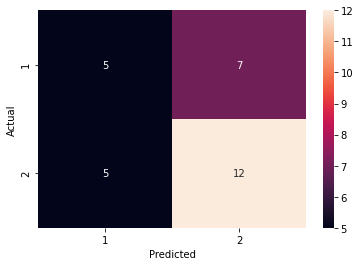

In [9]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [11]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5862068965517241
